In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix


In [2]:
X, y = make_moons(n_samples=500, noise=0.25, random_state=42)


In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [4]:
linear_model = SVC(kernel="linear", C=1.0, random_state=42)
linear_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [5]:
linear_pred = linear_model.predict(X_val_scaled)
print("Linear SVM Report:\n", classification_report(y_val, linear_pred))
print("Accuracy:", accuracy_score(y_val, linear_pred))


Linear SVM Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.86        75
           1       0.86      0.84      0.85        75

    accuracy                           0.85       150
   macro avg       0.85      0.85      0.85       150
weighted avg       0.85      0.85      0.85       150

Accuracy: 0.8533333333333334


In [6]:
rbf_model = SVC(kernel="rbf", random_state=42)
rbf_model.fit(X_train_scaled, y_train)

rbf_pred = rbf_model.predict(X_val_scaled)
print("RBF SVM:\n", classification_report(y_val, rbf_pred))


RBF SVM:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95        75
           1       0.99      0.91      0.94        75

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



In [7]:
poly_model = SVC(kernel="poly", degree=3, random_state=42)
poly_model.fit(X_train_scaled, y_train)

poly_pred = poly_model.predict(X_val_scaled)
print("Poly SVM:\n", classification_report(y_val, poly_pred))


Poly SVM:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88        75
           1       0.92      0.81      0.87        75

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



In [8]:
print("\nValidation Accuracy Comparison:")
print("Linear:", accuracy_score(y_val, linear_pred))
print("RBF:", accuracy_score(y_val, rbf_pred))
print("Poly:", accuracy_score(y_val, poly_pred))



Validation Accuracy Comparison:
Linear: 0.8533333333333334
RBF: 0.9466666666666667
Poly: 0.8733333333333333


In [9]:
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.1, 1, 10, 100],
    "kernel": ["rbf"]
}

grid = GridSearchCV(
    SVC(random_state=42),
    param_grid,
    cv=5,
    scoring="accuracy",
    verbose=1,
    refit=True
)


In [10]:
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.1, 1, ...], 'kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [11]:
print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Params: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.9514285714285714


In [12]:
final_pred = grid.predict(X_val_scaled)

print("\nFinal Tuned Model Report:\n")
print(classification_report(y_val, final_pred))



Final Tuned Model Report:

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        75
           1       1.00      0.93      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



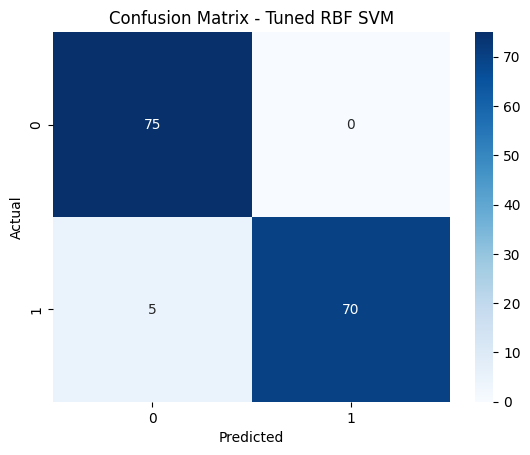

In [13]:
cm = confusion_matrix(y_val, final_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned RBF SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [16]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 400),
        np.linspace(y_min, y_max, 400)
    )

    mesh_input = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(mesh_input)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors='k')
    plt.title(title)


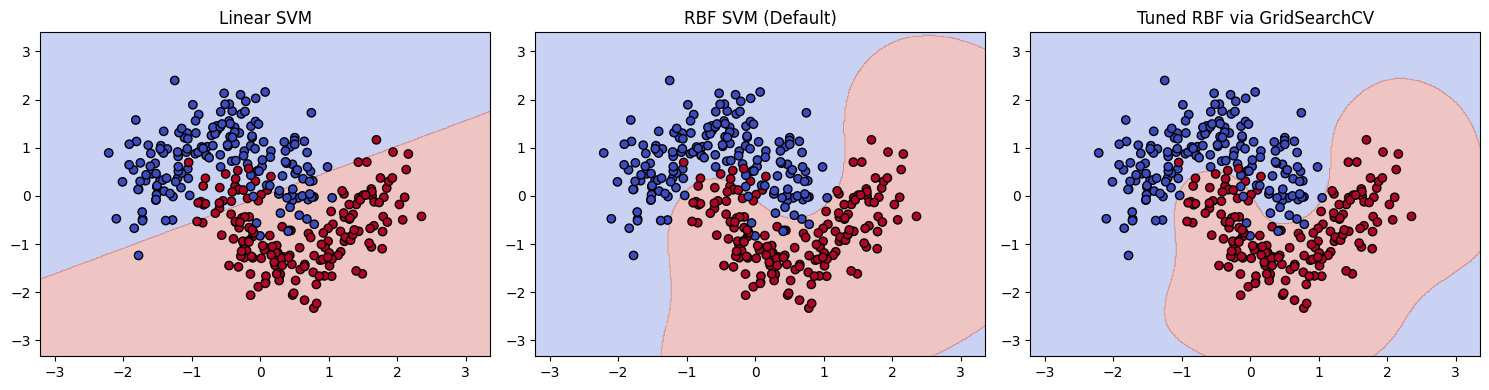

In [15]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plot_decision_boundary(linear_model, X_train_scaled, y_train, "Linear SVM")

plt.subplot(1, 3, 2)
plot_decision_boundary(rbf_model, X_train_scaled, y_train, "RBF SVM (Default)")

plt.subplot(1, 3, 3)
plot_decision_boundary(grid.best_estimator_, X_train_scaled, y_train, "Tuned RBF via GridSearchCV")

plt.tight_layout()
plt.show()
